In [ ]:
#pip install matplotlib SchemDraw

In [1]:
import schemdraw as schemdraw
import schemdraw.elements as elm
import schemdraw.flow as flow 
from pypdf import PdfReader, PdfWriter, Transformation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LogLocator, MultipleLocator
import matplotlib as mpl

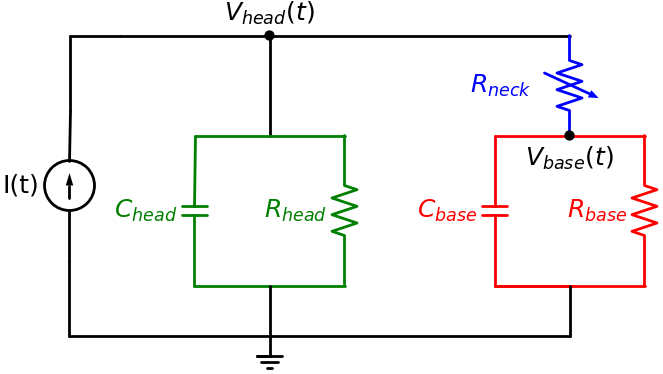

In [2]:
FS = 18
with schemdraw.Drawing() as d:
    elm.SourceI().label('I(t)', fontsize=FS)
    elm.Line().up(1.5)
    elm.Line().right(1)
    Vh = elm.Line().right()
    d.push()
    elm.Line().down(2)
    elm.Line().left().length(1.5).color('green')
    elm.Capacitor().down().color('green').label('$C_{head}$', loc='top', fontsize=FS)
    elm.Line().right().color('green')
    elm.Resistor().up().color('green').label('$R_{head}$', loc='top', fontsize=FS)
    elm.Line().left(1.5).color('green')
    d.pop()
    elm.Dot().label('$V_{head}(t)$', fontsize=FS)
    elm.Line().right(6)
    elm.ResistorVar().down(2).color((0,0,1)).label('$R_{neck}$', loc='top', fontsize=FS) #\n10MΩ
    #
    elm.Dot().label('$V_{base}(t)$', loc='bottom', fontsize=FS)  
    #
    elm.Line().left().length(1.5).color((1,0,0))
    elm.Capacitor().down().color((1,0,0)).label('$C_{base}$', loc='top', fontsize=FS)
    d.push()
    elm.Line().right(3).color((1,0,0))
    elm.Resistor().up().color((1,0,0)).label('$R_{base}$', loc='top', fontsize=FS)
    elm.Line().left(1.5).color((1,0,0))
    #
    d.pop()
    elm.Line().right(1.5).color((1,0,0))
    elm.Line().down(1)
    elm.Line().left(6)
    d.push()
    elm.Ground()
    elm.Line().left(4)
    elm.Line().up(1.5)
    d.pop()
    elm.Line().up(1)

#d.save('circuit_diagram_without_values_colors.pdf')

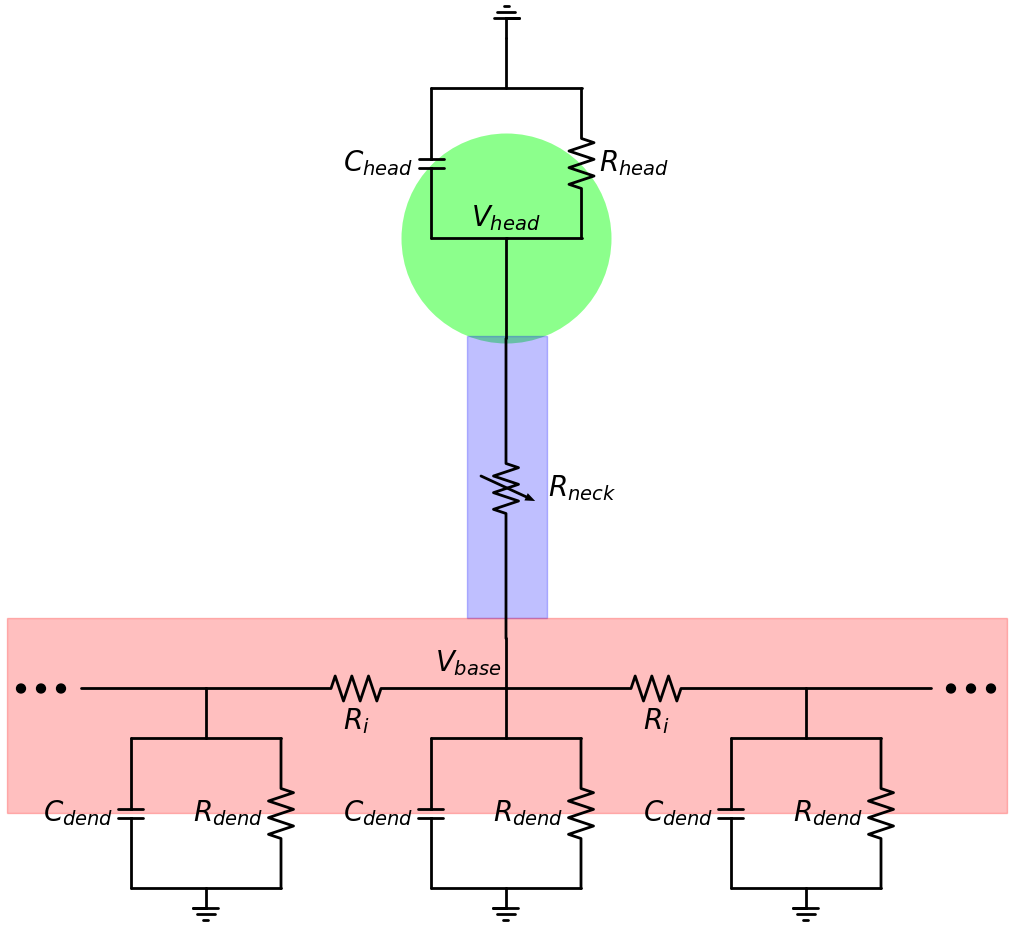

In [3]:
FS = 20 # font size

with schemdraw.Drawing(inches_per_unit=0.5, margin=0.1) as d:
    elm.Ground().theta(180)
    elm.Line().down(1)
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{head}$', loc='top', fontsize=FS)
    elm.Line().right(1.5)
    d.push()
    d += elm.Line().right(0.01).label('$V_{head}$', loc='top', fontsize=FS)
    vhead_xy = tuple(d.here)  # capture coords to highlight
    elm.Line().right(1.5)
    elm.Resistor().up().label('$R_{head}$', loc='bottom', fontsize=FS)
    elm.Line().left(1.5)
    d.pop()
    elm.Line().down(2.0)
    elm.ResistorVar().down(6).label('$R_{neck}$', loc='bottom', fontsize=FS)
    elm.Line().down(1.0).label('$V_{base}$', fontsize=FS)
    s = d
    s.push()
    elm.Line().down(1.0)
    ##
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{dend}$', loc='top', fontsize=FS)
    elm.Line().right(1.5)
    d.push()
    elm.Line().right(1.5)
    elm.Resistor().up().label('$R_{dend}$', loc='top', fontsize=FS)
    elm.Line().left(1.5)
    d.pop()
    elm.Ground()
    s.pop()
    s.push()
    elm.Resistor().right(6).label('$R_{i}$', loc='bottom', fontsize=FS)
    f = s
    f.push()
    ## RC block:
    elm.Line().down(1.0)
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{dend}$', loc='top', fontsize=FS)
    elm.Line().right(1.5)
    d.push()
    elm.Line().right(1.5)
    elm.Resistor().up().label('$R_{dend}$', loc='top', fontsize=FS)
    elm.Line().left(1.5)
    d.pop()
    elm.Ground()
    ## Raxial on the right:
    f.pop()
    elm.Line().right(2.5)
    for i in range(3):
        elm.Line().right(0.4).color('none')#.lw(0)
        elm.Dot(r=0.01).color('k').fill('k')

    ## Left RC:
    s.pop()
    elm.Resistor().left(6).label('$R_{i}$', loc='bottom', fontsize=FS)
    v = s
    v.push()
    ## RC block:
    elm.Line().down(1.0)
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{dend}$', loc='top', fontsize=FS)
    elm.Line().right(1.5)
    d.push()
    elm.Line().right(1.5)
    elm.Resistor().up().label('$R_{dend}$', loc='top', fontsize=FS)
    elm.Line().left(1.5)
    d.pop()
    elm.Ground()
    ## Raxial on the right:
    v.pop()
    elm.Line().left(2.5)
    for i in range(3):
        elm.Line().left(0.4).color('none')#.lw(0)
        elm.Dot(r=0.01).color('k').fill('k')
    

    # Green spine head
    w, h = 4.2,4.2
    d += flow.Circle(w=w, h=h, fill=(0, 1, 0, 0.45), color='none', lw=0).at((vhead_xy[0], vhead_xy[1]+0.0)).anchor('center')
    
    ### Neck:
    cx, cy = vhead_xy[0] + 0.0, vhead_xy[1]-4.50   # place cylinder to the right of V_head
    w, h   = 1.6, 6.2
    etop   = w * 0.35                          # top/bottom ellipse thickness
    d += flow.Process(w=w, h=h-etop, fill=(0, 0, 1, 0.25), color='none', lw=0).at((cx, cy - etop/2)).anchor('center')

    ### Dendrite:
    cx, cy = vhead_xy[0] + 0.0, vhead_xy[1]-6.04   # place cylinder to the right of V_head
    w, h   = 20.0, 3.9
    etop   = w * 0.35                          # top/bottom ellipse thickness
    d += flow.Process(w=w, h=h, fill=(1, 0, 0, 0.25), color='none', lw=0).at((cx, cy - etop/2)).anchor('center')
    
#d.save('circuit_spine_dendrites_S.pdf')

# Bode plot for the circuit impedance

In [4]:
# For Arial text into Latex expressions
mpl.rcParams.update({
    'font.family'      : 'Arial',   # normal text
    'mathtext.fontset' : 'custom',  # allow custom TTF
    'mathtext.rm'      : 'Arial',
    #'mathtext.it'      : 'Arial:italic',
    #'mathtext.bf'      : 'Arial:bold',
})


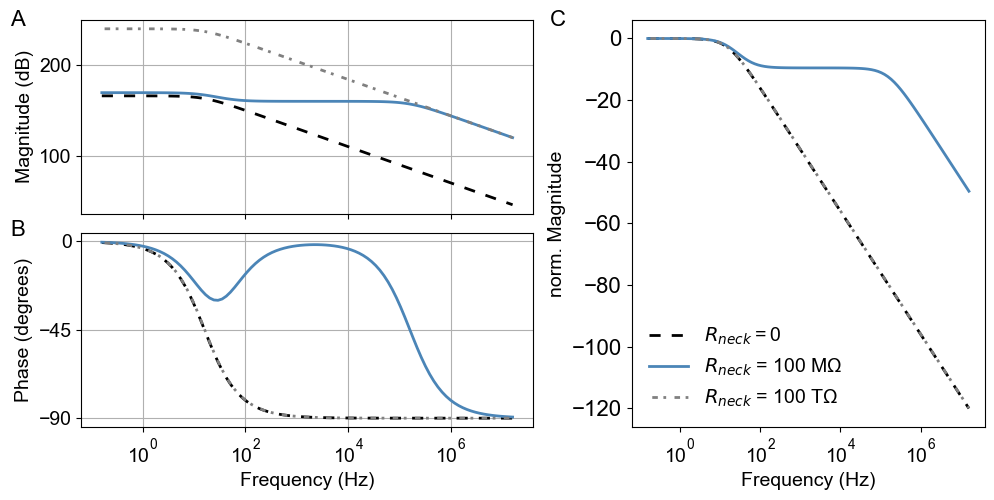

In [5]:
def Z(w, Rneck):
    return (1e12 * Rneck * (0.01j*w + 1) + 2e20) / ((0.01j*w + 1) * (Rneck * (0.01j*w + 1) + 1.0002e12)
    )

# Frequency range
w = np.logspace(0, 8, 100)  # 1 to 10^8 rad/s

# Calculate the magnitude and phase for R_neck = 0 ohm
Z_0 = Z(w, 0)
mag_0 = np.abs(Z_0)
phase_0 = np.angle(Z_0, deg=True)

# Calculate the magnitude and phase for R_neck = 10 M ohm
Z_10M = Z(w, 10e6) 
mag_10M = np.abs(Z_10M)
phase_10M = np.angle(Z_10M, deg=True)

# Calculate the magnitude and phase for R_neck = 100 M ohm
Z_100M = Z(w, 100e6)
mag_100M = np.abs(Z_100M)
phase_100M = np.angle(Z_100M, deg=True)

# Calculate the magnitude and phase for R_neck = 20 T ohm
Z_100T = Z(w, 100e12)
mag_100T = np.abs(Z_100T)
phase_100T = np.angle(Z_100T, deg=True)

freq_hz = w / (2*np.pi)

# Plot the Bode plot
fig = plt.figure(figsize=(10 , 5)) # w, h
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 2])
ax1 = fig.add_subplot(gs[0, 0:2])
ax3 = fig.add_subplot(gs[1, 0:2])
ax2 = fig.add_subplot(gs[0:2, 2])


ax1.semilogx(freq_hz, 20*np.log10(mag_0), label='$R_{neck} = 0 $', color='k', linestyle=(0, (4, 4)), lw=2)
ax1.semilogx(freq_hz, 20*np.log10(mag_100M), label='$R_{neck}$ = 100 M$\Omega$', color='#4b85b7', lw=2)
ax1.semilogx(freq_hz, 20*np.log10(mag_100T), label='$R_{neck}$ = 100 T$\Omega$', color='gray', linestyle=(7, (2, 2, 1, 3)), lw=2)
ax1.set_ylabel('Magnitude (dB)', fontsize=14, family='Arial')
ax1.grid(True)
ax1.set_xticklabels([])
for label in ax1.get_yticklabels():
    label.set_fontfamily('Arial')
    
ax1.tick_params(axis="x", labelsize=14); ax1.tick_params(axis="y", labelsize=14)

ax3.semilogx(freq_hz, phase_0, label='R_neck = 100 ohm', color='k', linestyle=(0, (4, 4)), lw=2)
ax3.semilogx(freq_hz, phase_100M, label='R_neck = 100 M ohm' , color='#4b85b7', lw=2)
ax3.semilogx(freq_hz, phase_100T, label='R_neck = 100 T ohm', color='gray', linestyle=(7, (2, 2, 1, 3)), lw=2)
ax3.set_xlabel('Frequency (Hz)', fontsize=14, family='Arial')
ax3.set_ylabel('Phase (degrees)', fontsize=14, family='Arial')
ax3.tick_params(axis="x", labelsize=14)
ax3.tick_params(axis="y", labelsize=14)
ax3.set_yticks([0, -45, -90 ])
plt.xticks(family='Arial'); plt.yticks(family='Arial')
ax3.grid(True)


mag_0_db      = 20*np.log10(mag_0)      - 20*np.log10(mag_0[0])
mag_100M_db   = 20*np.log10(mag_100M)   - 20*np.log10(mag_100M[0])
mag_100T_db   = 20*np.log10(mag_100T)   - 20*np.log10(mag_100T[0])
ax2.semilogx(freq_hz, mag_0_db, label='$R_{neck} = 0$', color='k',linestyle=(0, (4, 4)), lw=2)
ax2.semilogx(freq_hz, mag_100M_db, label='$R_{neck}$ = 100 M$\Omega$', color='#4b85b7', lw=2)
ax2.semilogx(freq_hz, mag_100T_db, label='$R_{neck}$ = 100 T$\Omega$', color='gray', linestyle=(7, (2, 2, 1, 3)), lw=2) # '-.'
plt.xlabel('Frequency (Hz)', fontsize=14, family='Arial')
ax2.set_ylabel('norm. Magnitude', fontsize=14, family='Arial')
ax2.legend(fontsize=14, frameon=False)
plt.xticks(family='Arial') 
plt.yticks(family='Arial')
plt.tick_params(axis="x", labelsize=14); plt.tick_params(axis="y", labelsize=16)


fig.text(0.01, 0.99, 'A', fontsize=16, ha='left', va='top')
fig.text(0.01, 0.57, 'B', fontsize=16, ha='left', va='top')
fig.text(0.55, 0.99, 'C', fontsize=16, ha='left', va='top')


plt.tight_layout()
#plt.savefig('Bode_plot_spine1.pdf')